In [1]:
setwd('/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2/')

In [2]:
options(stringsAsFactors = F)
library(GEOquery)
gset1 <- getGEO(GEO = "GSE16561",
               AnnotGPL=TRUE ,
               destdir = ".")

Loading required package: Biobase

Warning message:
"package 'Biobase' was built under R version 4.2.3"
Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GE

In [3]:
gse1 <- gset1[[1]]##ExpressionSet

In [4]:
ExperimentData <-gse1@experimentData

In [5]:
assayData <- gse1@assayData
exp1 <- assayData$exprs

In [6]:
phenoData <- gse1@phenoData
pphenoData <-phenoData@data

In [7]:
featureData <- gse1@featureData

In [8]:

dim(pData(gse1))
metdata<-pData(gse1)

[1] 63 38

In [9]:
fd1 <- gse1@featureData@data

In [10]:
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [11]:
exp2 = exp1 %>%  as.data.frame() %>%  tibble::rownames_to_column(.,'ID')

In [13]:
anno = fd1[,c('ID','Gene symbol')]

In [14]:
colnames(anno)[2] = 'Symbol'

In [15]:
anno = anno[!duplicated(anno$Symbol),]

In [16]:
anno$ID = as.character(anno$ID)

In [17]:
head(anno,2)

,ID,Symbol
,<chr>,<chr>
ILMN_1343291,ILMN_1343291,EEF1A1
ILMN_1651209,ILMN_1651209,SLC35E2


In [18]:
expr = left_join(anno,exp2,by = 'ID',na_matches = 'never')

In [19]:
head(expr,2)

,ID,Symbol,GSM416528,GSM416529,GSM416530,GSM416531,GSM416532,GSM416533,GSM416534,GSM416535,...,GSM416581,GSM416582,GSM416583,GSM416584,GSM416585,GSM416586,GSM416587,GSM416588,GSM416589,GSM416590
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ILMN_1343291,EEF1A1,0.22550488,0.7348099,0.7431908,0.6326199,-0.1777344,-0.3018122,-0.1339159,0.02217388,...,0.4520197,0.108350754,-0.139081950,0.1467428,0.6359911,-0.5917425,-0.3624802,-0.2357187,0.02482796,-0.3616772
2,ILMN_1651209,SLC35E2,-0.03326082,0.5184302,0.5990343,0.2514443,-0.1647139,-0.6322088,-0.1420793,-0.15839338,...,0.4472494,-0.006593227,-0.004887581,0.1669593,0.5194721,-0.3607216,-0.2699127,0.1100197,0.43926240,-0.1279936


In [20]:
library(tidyr)
df2 <-expr %>% as_tibble() %>% 
  separate_rows(Symbol, sep = "///")

In [21]:
head(df2,3)

ID,Symbol,GSM416528,GSM416529,GSM416530,GSM416531,GSM416532,GSM416533,GSM416534,GSM416535,...,GSM416581,GSM416582,GSM416583,GSM416584,GSM416585,GSM416586,GSM416587,GSM416588,GSM416589,GSM416590
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ILMN_1343291,EEF1A1,0.22550488,0.7348099,0.7431908,0.63261986,-0.1777344,-0.3018122,-0.1339159,0.02217388,...,0.4520197,0.108350754,-0.139081950,0.1467428,0.6359911,-0.5917425,-0.3624802,-0.2357187,0.02482796,-0.3616772
ILMN_1651209,SLC35E2,-0.03326082,0.5184302,0.5990343,0.25144434,-0.1647139,-0.6322088,-0.1420793,-0.15839338,...,0.4472494,-0.006593227,-0.004887581,0.1669593,0.5194721,-0.3607216,-0.2699127,0.1100197,0.43926240,-0.1279936
ILMN_1651228,RPS28,-0.20895290,-0.9036322,-0.3511963,-0.06179523,1.2536068,1.2912292,1.3900938,1.07819750,...,-1.0269718,-0.644925100,-1.714361200,-0.8453531,-1.9072886,-0.7953138,0.4016895,0.6634083,0.80764294,0.6810741


In [22]:
df2 = df2[!duplicated(df2$Symbol),]

In [23]:
expr = df2[-1,2:65] %>% tibble::remove_rownames() %>% tibble::column_to_rownames(.,'Symbol')

In [246]:
#expr = log1p(expr)

In [24]:
tail(expr,2)

,GSM416528,GSM416529,GSM416530,GSM416531,GSM416532,GSM416533,GSM416534,GSM416535,GSM416536,GSM416537,...,GSM416581,GSM416582,GSM416583,GSM416584,GSM416585,GSM416586,GSM416587,GSM416588,GSM416589,GSM416590
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SEPT1,0.1714459,0.1631255,-0.01954365,-0.1366901,-0.3399448,-0.2386942,-0.13190937,-0.7261014,0.12032223,0.1746235,...,0.2767973,0.02683449,0.001900673,-0.4277387,0.05646276,0.1213016,0.08458233,-0.04449272,0.2540712,0.4209871
WSB1,-0.1338301,-0.3909855,-0.52571680,0.6411343,0.5250301,0.4095411,0.03905964,1.6884432,0.07073021,0.2404661,...,-1.0894842,-0.46221924,-0.388005260,-0.9362278,-0.52996254,-0.3300400,-0.43326283,-0.03193760,-0.6803732,-0.2740755


In [30]:
table(metdata$description)


Control  Stroke 
     24      39 

In [31]:
table(metdata$`description`)


Control  Stroke 
     24      39 

In [32]:
metdata = metdata[,c('geo_accession','description')]

In [33]:
colnames(metdata) = c('sample','group')

In [34]:
dim(metdata)

[1] 63  2

In [35]:
metdata.sort  <- metdata[order(metdata$group), ]

In [36]:
metdata.sort$group

[1] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
 [8] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[15] "Control" "Control" "Control" "Control" "Control" "Control" "Control"
[22] "Control" "Control" "Control" "Stroke"  "Stroke"  "Stroke"  "Stroke" 
[29] "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke" 
[36] "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke" 
[43] "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke" 
[50] "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke" 
[57] "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"  "Stroke"

In [37]:
table(metdata$group)


Control  Stroke 
     24      39 

In [38]:
metdata.sort$group = c(rep('Con',24),rep('CI',39))

In [41]:
expr = expr[,rownames(metdata.sort)] 
metdata = metdata.sort

In [50]:
expr =  t(expr) %>% as.data.frame()

In [51]:
table(metdata$group)


 CI Con 
 39  24 

In [52]:
Group =metdata.sort$group

In [53]:
set.seed(1234)
#expr = as.data.frame(apply(expr,2,as.numeric))
expr3 = cbind(Group,expr)

In [54]:
expr3$Group = ifelse(expr3$Group == 'CI',1,0)
expr3$Group = as.factor(expr3$Group)

In [57]:
model.gene =  c('BCL2A1','JCHAIN','TXN')
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))
dim(expr4)

[1] 63  4

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting 

[1] 0.7915124

 [1] 0.7981481 0.7670251 0.7882353 0.7944444 0.8121442 0.8137255 0.7745098
 [8] 0.7962649 0.7798861 0.7907407


Setting levels: control = 1, case = 2

Setting direction: controls < cases



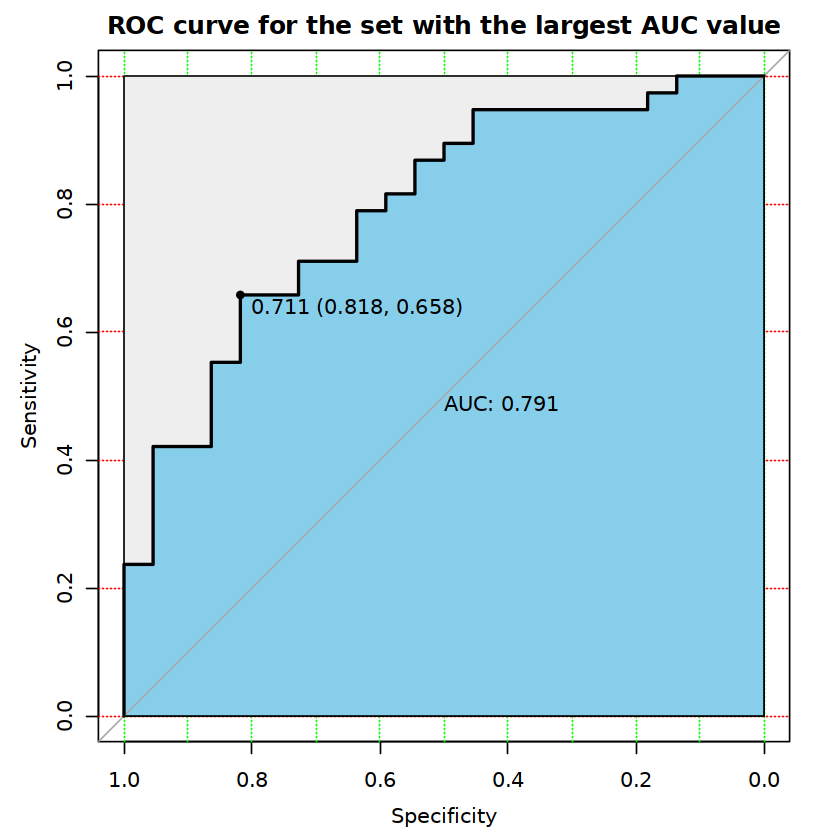

In [58]:
library(caret)
data = expr4
set.seed(1)
folds <-createMultiFolds(y=data$Group,k=5,times=10)

auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=data,family=binomial())
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)
num <- which.max(auc_value)
print(auc_value)
fold_train <- data[folds[[num]],]   
fold_test <- data[-folds[[num]],]
fold_pre <- glm(Group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="ROC curve for the set with the largest AUC value")

In [61]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 4.2.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:BiocGenerics':

    var


The following objects are masked from 'package:stats':

    cov, smooth, var




null device 
          1

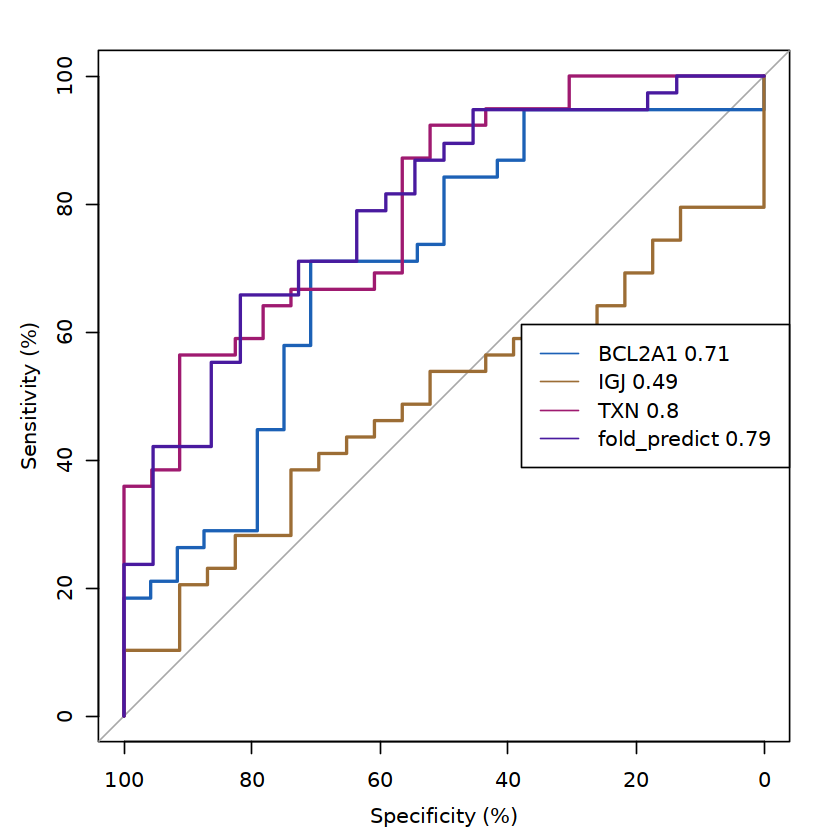

In [63]:
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
#rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$JCHAIN,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               #paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#9C6D35","#9F1A70","#491A9F"), lwd=1)



In [64]:
pdf('./fig.re/GSE16561.pdf',width = 5,height = 5)
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
#rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$JCHAIN,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               #paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#9C6D35","#9F1A70","#491A9F"), lwd=1)

dev.off()

png 
  2

In [260]:
library(limma)
library(dplyr)
group_list <- metdata$group 
design <- model.matrix(~0+factor(group_list))
colnames(design)=levels(factor(group_list))

In [261]:
fomula = 'HCC-Adjacent'

In [262]:
constrast.matrix <- makeContrasts(contrasts = fomula,levels = design)

In [263]:
design <- model.matrix(~0+factor(group_list))
colnames(design) <- levels(factor(group_list))
fomula = 'HCC-Adjacent'
constrast.matrix <- makeContrasts(contrasts = fomula,levels = design)
constrast.matrix

,HCC-Adjacent
Adjacent,-1
HCC,1


In [264]:
fit <- lmFit(expr,design)
fit2 <- contrasts.fit(fit,constrast.matrix)
fit2 <- eBayes(fit2)
DEG <- topTable(fit2,coef = 1,n=Inf) |> na.omit() # 
#DEG <- tibble::rownames_to_column(DEG,var = 'Gene')

In [265]:
diff = DEG

In [266]:
foldChange=0.5
padj=0.05

In [270]:
    diff$group = as.factor(ifelse(diff$adj.P.Val < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
    table(diff$group)
    res = diff


     Down NoSignifi        Up 
     1415     14826      1835 

In [271]:
res['HK2',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
HK2,0.5639566,1.900971,2.596876,0.009679411,0.01514193,-4.58098,Up


In [272]:
GSE25097 = res %>% filter(group != 'NoSignifi') %>% rownames()
saveRDS(GSE25097,file = 'GSE25097.rds')

In [42]:
library("edgeR")  
library(dplyr)
library(ggrepel)
library(ggplot2)
library(cowplot)
library(pheatmap)

Warning message:
"package 'edgeR' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Warning message:
"package 'pheatmap' was built under R version 4.2.3"


In [43]:
options(repr.plot.width = 5,repr.plot.height = 5)

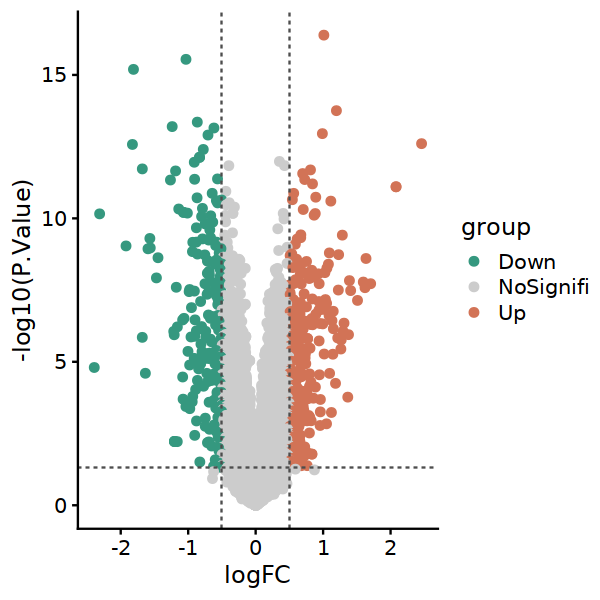

In [44]:
 top_5 <- bind_rows(   
      res %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      res %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )
    ggplot(data=res,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.05), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-0.5,.5),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
  scale_color_manual(values = c("#35987F","grey80","#D27356"))+
    theme_half_open() 


In [45]:
ggsave('./fig1-trainset/fig1.pdf',height = 6,width = 6)

In [46]:
write.csv(diff,file = './fig1-trainset/test3.diffgene.csv')

In [47]:
res['TALDO1',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
TALDO1,-0.6182054,7.891374,-8.982172,7.07573e-14,2.137578e-10,21.12717,Down


In [48]:
save(expr,group_list ,file = 'test3.step1.rda')

In [49]:
model =  readRDS('./feature.test3.rds')

In [50]:
s1 = expr[model,] %>% t() %>% as.data.frame()

In [51]:
s2 = cbind(s1,group_list)

In [52]:
s3 = reshape2::melt(s2,id.vars = 'group_list',variable.name = 'gene',value.name = 'expr')

In [53]:
library(ggpubr) # 
library(patchwork) # 
library(ggsci) #

Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




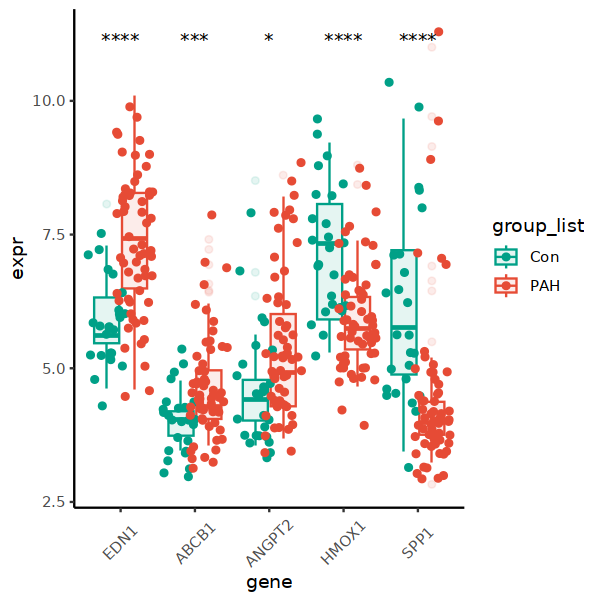

In [54]:
p5 = ggplot(s3,aes(x=gene,y=expr,color=group_list))+
  geom_boxplot(aes(fill=group_list),
               alpha=0.1)+
  geom_jitter(position = position_jitterdodge(jitter.height=0.75, # 
                                              jitter.width = 0.5, # 
                                              dodge.width = 0.75))+ # 
  scale_color_manual(values = rev( pal_npg('nrc')(9)[c(1,3)]) )+
  scale_fill_manual(values = rev( pal_npg('nrc')(9)[c(1,3)]) )+
    theme_classic()
# +theme(panel.grid = element_blank())

p5 <- p5 + stat_compare_means(aes(group = group_list),
                        label="p.signif",
                       show.legend = F)+theme(axis.text.x = element_text(angle = 45,vjust = 0.5,hjust = 0.5))
p5
ggsave('./fig1-trainset/boxplot.pdf',width = 5,height = 3.6)

In [55]:
group_list

[1] "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con"
[13] "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con" "Con"
[25] "Con" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH"
[37] "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH"
[49] "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH"
[61] "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH"
[73] "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH" "PAH"

In [56]:
featrue = readRDS('./feature.test3.rds')

In [57]:
diff[featrue,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
EDN1,1.3763668,6.899978,5.254059,1.130211e-06,5.901375e-05,5.2516337,Up
ABCB1,0.6841459,4.457709,3.590136,5.582463e-04,6.515030e-03,-0.5807859,Up
ANGPT2,0.6813531,5.171786,2.242082,2.762284e-02,1.100905e-01,-4.0858504,Up
HMOX1,-1.2139352,6.297885,-5.317644,8.716744e-07,4.738637e-05,5.4986384,Down
SPP1,-1.6345518,4.943027,-4.464663,2.505991e-05,6.219977e-04,2.3178742,Down


In [58]:
library(enrichplot)
library(clusterProfiler)
library(org.Hs.eg.db)

Warning message:
"package 'enrichplot' was built under R version 4.2.2"


Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree


Attaching package: 'enrichplot'


The fo

In [59]:
 res %>%  filter(group != 'NoSignifi') -> df1
    #write.csv(df1,file = '/import/DB/minidir/a.moth10//OS/fig3/GSE21257.heatmap_gene.csv')
    library(dplyr)
    TPMMat_DEG <- df1
    
    ## 3. code of GO/KEGG
    heat1 = TPMMat_DEG
    gene_symbol <- bitr(geneID = rownames(heat1),  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 0.05,  
                   readable = TRUE)  

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = rownames(heat1), fromType = "SYMBOL", toType = c("ENTREZID"), :
"3.67% of input gene IDs are fail to map..."


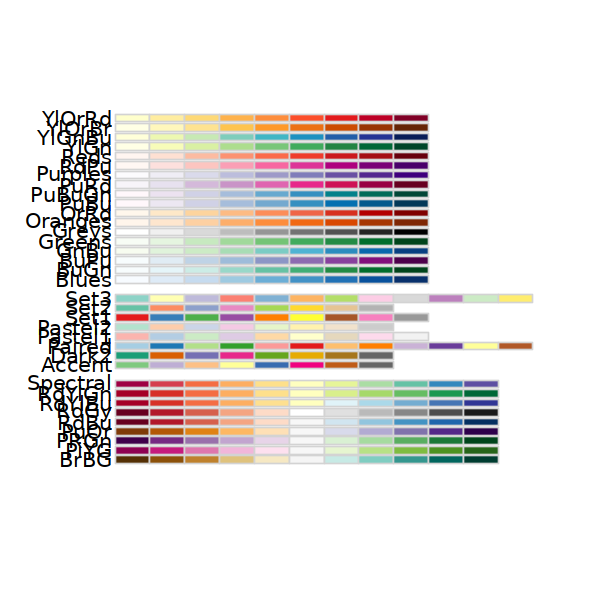

In [60]:
 BP %>% filter(ONTOLOGY	 == 'BP') %>% head(5) -> bp
 BP %>% filter(ONTOLOGY	 == 'CC') %>% head(5) -> cc
 BP %>% filter(ONTOLOGY	 == 'MF') %>% head(5) -> mf
go = rbind(bp,cc,mf)
library(ggplot2)
library(RColorBrewer)
display.brewer.all()

In [61]:
color <- brewer.pal(3,"Accent")
colorl <- rep(color,each=5)
go$Description<- factor(go$Description,levels=go$Description)
options(repr.plot.width = 8)

In [62]:
options(repr.plot.width = 8,repr.plot.height = 6)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."
Warning message:
"A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
i Please use the `legend.position.inside` argument of `theme()` instead."


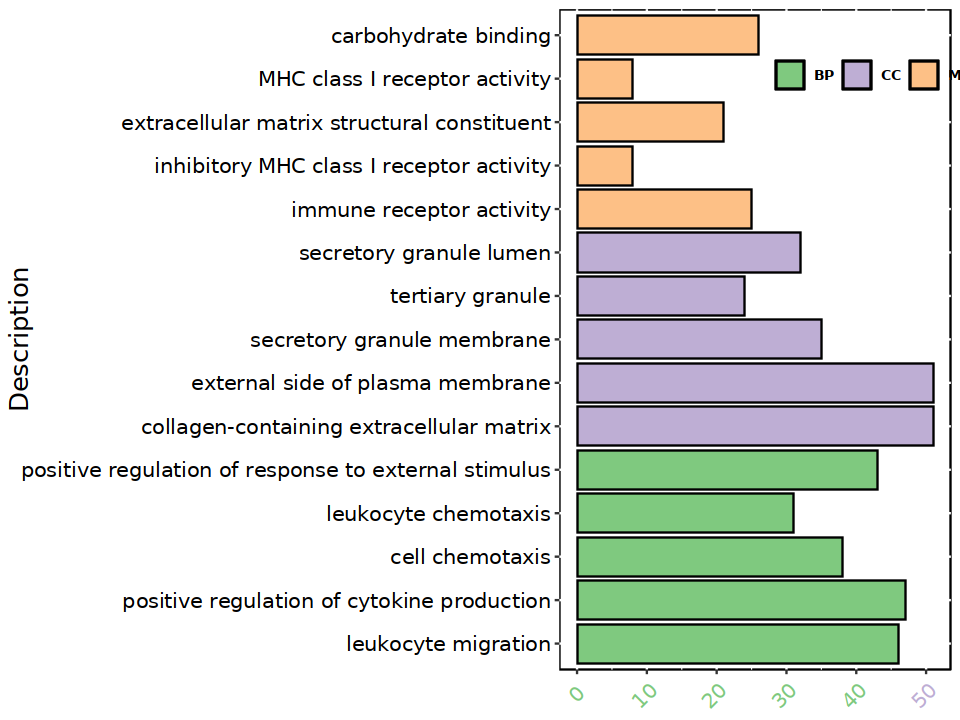

In [63]:
ggplot(go) +
  aes(x = Description, y = Count, fill = ONTOLOGY) + coord_flip()+
  geom_bar(stat = "identity",colour="black") +
  #scale_fill_hue() +
  scale_fill_manual(values =color)+
  theme(
    axis.title=element_text(size=15,face="plain",color="black"),
    axis.text = element_text(size=12,face="plain",color="black"),
    axis.text.x = element_text(angle = 45,colour = colorl,hjust=0.7,vjust=0.6),
    axis.title.x = element_blank(),
    legend.title = element_blank(),
    legend.text = element_text(size = 8, face = "bold"),
    legend.margin = margin(t = 0, r = 0, b = 0, l = 0, unit = "pt"),
    legend.direction = "horizontal",
    legend.position = c(0.8,0.9),
    legend.background = element_blank(),
    panel.background = element_rect(fill = "transparent",colour = "black"),
    plot.background = element_blank()
  )

In [64]:
ggsave('./fig1-trainset/GO.pdf',width = 8,height = 5)

In [65]:
jiaoji = diff %>%  dplyr::filter(group != 'NoSignifi') %>%  row.names()

In [66]:
diff1 = diff %>% filter(group != 'NoSignifi')
diff1$gene = rownames(diff1)

In [67]:
head(diff1,2)

,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
LTBP1,1.011100,8.148245,10.60775,4.102651e-17,8.675877e-13,28.24604,Up,LTBP1
CSF3R,-1.032615,7.047086,-10.18149,2.861200e-16,3.025290e-12,26.39449,Down,CSF3R


In [68]:
library(clusterProfiler)
group <- data.frame(gene=diff1$gene,group=diff1$group)#

Gene_ID <- bitr(diff1$gene, fromType="SYMBOL", toType="ENTREZID", OrgDb="org.Hs.eg.db")

data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
diff_KEGG <- compareCluster(ENTREZID~group,
                            data=data,
                            fun = "enrichKEGG",#
                            pAdjustMethod = "BH",
                            pvalueCutoff = 0.05,
                            qvalueCutoff = 0.05,
                            organism= "hsa")#

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(diff1$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"3.67% of input gene IDs are fail to map..."


In [69]:

diff_KEGG1 = setReadable(diff_KEGG,OrgDb = "org.Hs.eg.db", keyType = "ENTREZID")

diff_KEGG <- diff_KEGG1@compareClusterResult

In [70]:
diff_KEGG$group = diff_KEGG$Cluster

In [71]:
sig = grep('metabolism|pathway',diff_KEGG$Description,value = T)

In [72]:
diff_KEGG <- diff_KEGG %>% filter(Description %in% sig) %>%   group_by(ID) %>%   filter(n()==1) %>% 
  group_by(group) %>% 
  dplyr::top_n(n = 10, wt = Count)
library(ggplot2)

In [73]:
options(repr.plot.height = 9)

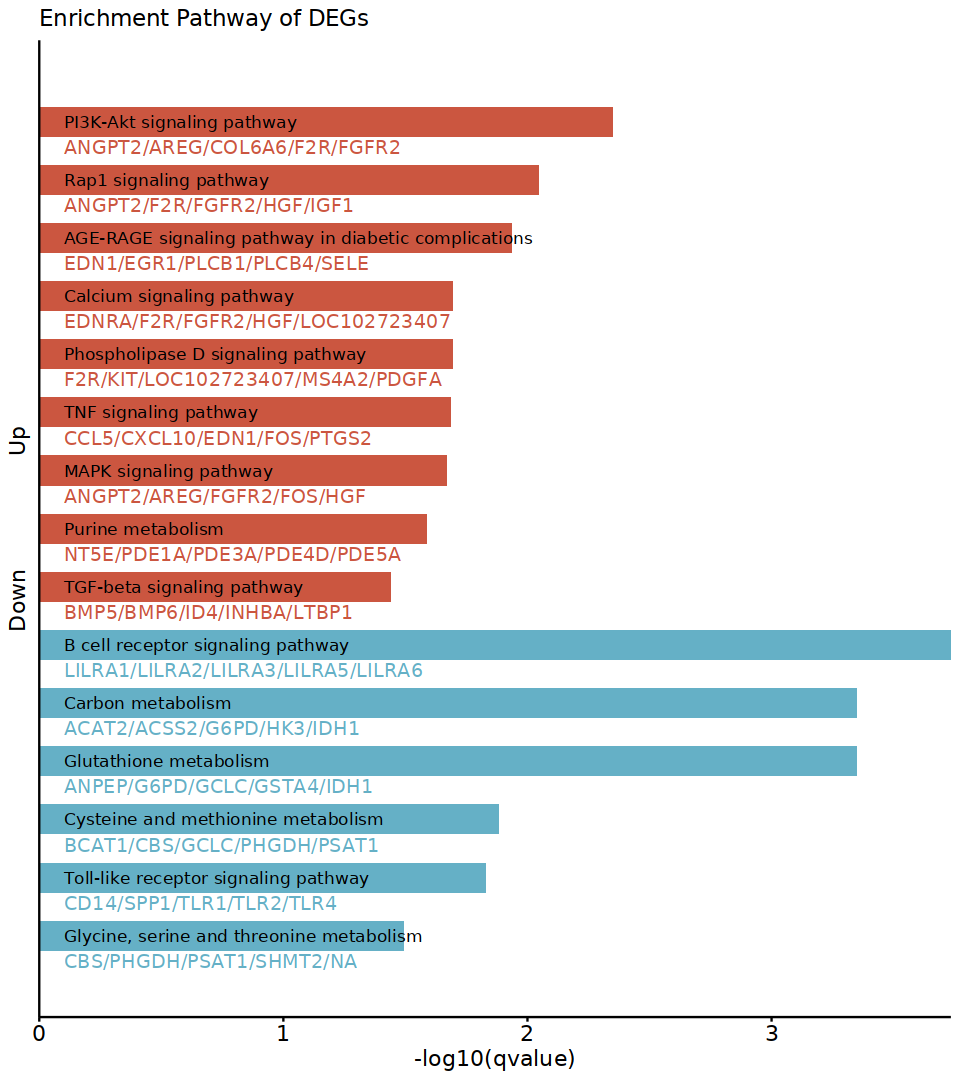

In [74]:
diff_KEGG$group <- factor(diff_KEGG$group, levels = c("Up","Down"))

diff_KEGG <- diff_KEGG[order(diff_KEGG$group), ]

diff_KEGG$Description <- factor(diff_KEGG$Description, levels = diff_KEGG$Description)

diff_KEGG$geneID  <- sapply(strsplit(diff_KEGG$geneID , "/"), function(x) paste(x[1:5], collapse = "/"))
ggplot(diff_KEGG, aes(x = -log10(qvalue), y = rev(Description), fill = group))+
  geom_bar(stat = "identity", width = 0.5)+
  geom_text(aes(x=0.1,y=rev(Description),label = Description),size=3.5, hjust =0)+
  theme_classic()+
  theme(axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        axis.title.y = element_text(colour = 'black', size = 13),
        axis.line = element_line(colour = 'black', linewidth =0.5),
        axis.text.x = element_text(colour = 'black', size = 13),
        axis.ticks.x = element_line(colour = 'black'),
        axis.title.x = element_text(colour = 'black', size = 13),
        legend.position = "none")+
  scale_x_continuous(expand = c(0,0))+
  scale_fill_manual(values = c("#CB5640","#65B0C6"))+
  geom_text(data = diff_KEGG,
            aes(x = 0.1, y = rev(Description), label = geneID, color = group),
            size = 4,
            fontface = 'italic', 
            hjust = 0,
            vjust = 2.3)+
  scale_color_manual(values = c("#CB5640","#65B0C6"))+
  scale_y_discrete(expand = c(0.1,0))+
  labs(title = "Enrichment Pathway of DEGs",
       y=c("Down                Up"))

ggsave('./fig1-trainset/KEGG.enrichment.pdf',width = 6,height = 6)

In [75]:
options(repr.plot.width = 7,repr.plot.height = 6)

In [76]:
geneset = read.table('./rusuan.txt',header =T)
jiaoji2 = intersect(jiaoji,geneset$Gene)

[1] 33 83

,GSM3290083,GSM3290085,GSM3290086,GSM3290088,GSM3290091,GSM3290092,GSM3290093,GSM3290094,GSM3290097,GSM3290098,...,GSM3290138,GSM3290139,GSM3290140,GSM3290141,GSM3290142,GSM3290143,GSM3290144,GSM3290145,GSM3290148,GSM3290149
PYGL,0.8080139,0.5876801,0.9388962,1.240861,0.6265186,1.690843,0.1480889,0.570216,0.7614868,2,...,0.05615497,-0.3866216,-1.413601,-1.572690,0.8884808,-0.7942721,-0.8004669,1.6427562359,-0.1053499,-0.8185462
ACAT2,1.4554371,0.4035560,-1.4611835,1.489953,2.0000000,-1.576732,-0.1322126,2.000000,-0.7673398,2,...,0.87189083,-0.5234369,-1.167669,-1.163949,-0.6230983,-1.0385731,0.2634545,0.0006524793,-0.5577512,-0.1310178


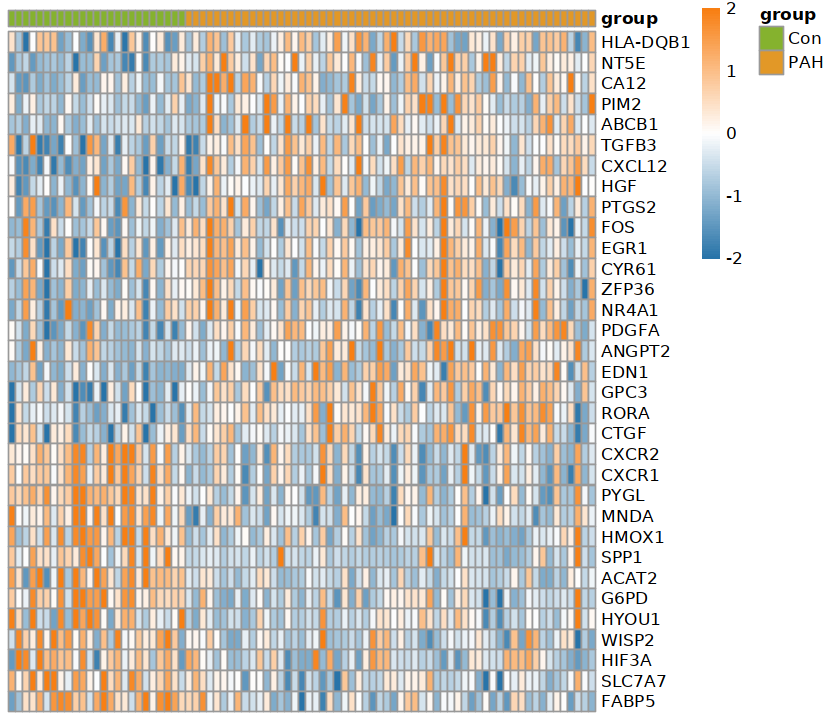

In [77]:
forplot = expr[jiaoji2,]

library(pheatmap)
#forplot = na.omit(forplot)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

library(pheatmap)
annotation_col = data.frame(  c(rep('Con',25),rep('PAH',58)) )
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)


groupcolor <- c("#85B22E","#E29827")

names(groupcolor) <- c("Con","PAH")
ann_colors <- list(group=groupcolor)

 x  = pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = F,
         show_rownames=T,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
               treeheight_col = 0,
               treeheight_row = 0,
               annotation_colors = ann_colors,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#
         # angle_col = 45 #
)

In [78]:
pdf('./fig1-trainset/fig1.heat.pdf',height = 4,width = 5)
x
dev.off()

png 
  2

In [79]:
data.frame(table(res$group))

Var1,Freq
<fct>,<int>
Down,221
NoSignifi,20657
Up,269


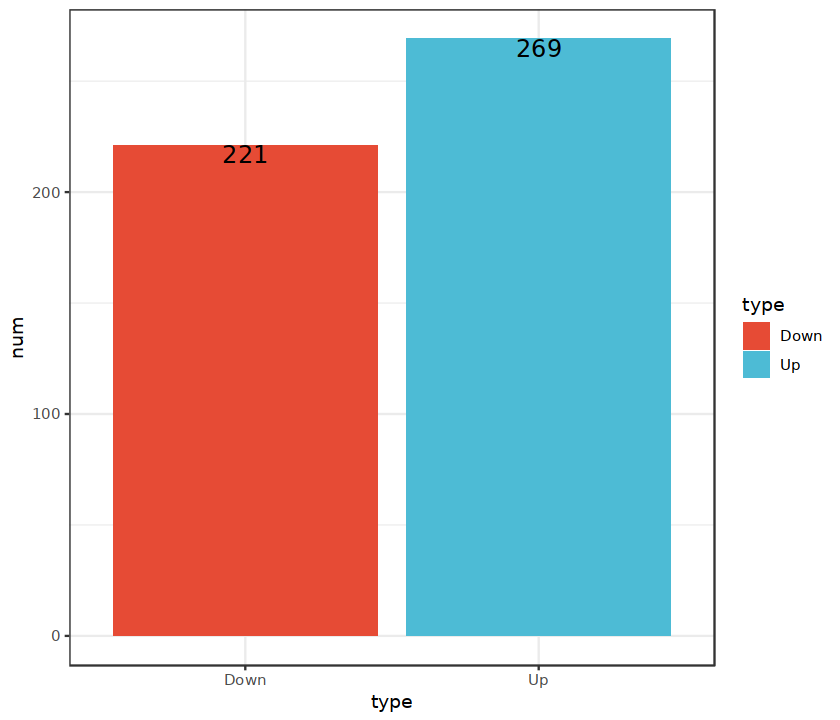

In [80]:
df = data.frame(type = c('Down','Up'),
               num = c(data.frame(table(res$group))[1,2],data.frame(table(res$group))[3,2]))

ggplot(df,aes(type,num,fill=type))+
  geom_bar(stat="summary",fun=mean,position = position_dodge(0.5)) +
ggsci::scale_fill_npg() + theme_bw()+
geom_text(aes(label=num),size=5,vjust=1)

In [81]:
ggsave(file = './fig1-trainset/fig2.bar.pdf',width = 4,height = 4.8)

In [82]:
library(GSVA)
library(GSEABase)
library(limma)

keggSet <- getGmt("/data/import/DB/kegg.gmt")

keggEs <- gsva(expr=as.matrix(expr), gset.idx.list=keggSet, kcdf="Gaussian", parallel.sz=8)

grouP <- c(rep('Con',25),rep('PAH',58)) %>% as.factor()
desigN <- model.matrix(~ grouP + 0)
rownames(desigN) <- colnames(expr)
desigN

 comparE <- makeContrasts(grouPPAH - grouPCon, levels=desigN)

fiT <- lmFit(keggEs, desigN)
fiT2 <- contrasts.fit(fiT, comparE)
fiT3 <- eBayes(fiT2)
keggDiff <- topTable(fiT3, coef=1, number=500)
head(keggDiff, n=3)

library(tidyverse)  # ggplot2 stringer dplyr tidyr readr purrr  tibble forcats
library(ggthemes)
library(ggprism)

degs <- keggDiff  #

Warning message:
"package 'GSVA' was built under R version 4.2.3"
Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML


Attaching package: 'XML'


The following object is masked from 'package:patchwork':

    free


Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


Warning message in getGmt("/data/import/DB/kegg.gmt"):
"28 record(s) contain duplicate ids: Alzheimer disease, Amyotrophic lateral sclerosis, ..., Spliceosome, Starch and sucrose metabolism"
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."


Setting parallel calculations through a MulticoreParam back-end
with workers=8 and tasks=100.
Estimating GSVA scores for 346 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 8 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



,grouPCon,grouPPAH
GSM3290083,1,0
GSM3290085,1,0
GSM3290086,1,0
GSM3290088,1,0
GSM3290091,1,0
GSM3290092,1,0
GSM3290093,1,0
GSM3290094,1,0
GSM3290097,1,0
GSM3290098,1,0


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Phosphonate and phosphinate metabolism,-0.6122939,-0.018756789,-7.938798,6.246369e-12,2.161244e-09,16.833177
Hedgehog signaling pathway,0.2950493,0.010581603,6.389451,7.724810e-09,1.336392e-06,9.996569
Pyruvate metabolism,-0.3327460,-0.007490603,-6.179861,1.958023e-08,2.258253e-06,9.105445


Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.2.1     v stringr 1.5.1
v readr   2.1.5     v forcats 1.0.0
v purrr   1.0.2     
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x ggplot2::Position()       masks BiocGenerics::Position(), base::Position()
x stringr::boundary()       masks graph::boundary()
x IRanges::collapse()       masks dplyr::collapse()
x dplyr::combine()          masks Biobase::combine(), BiocGenerics::combine()
x IRanges::desc()           masks dplyr::desc()
x S4Vectors::expand()       masks tidyr::expand()
x clusterProfiler::filter() masks dplyr::filter(), stats::filter()
x S4Vectors::first()        masks dplyr::first()
x dplyr::lag()              masks

In [83]:
head(degs,4)

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Phosphonate and phosphinate metabolism,-0.6122939,-0.018756789,-7.938798,6.246369e-12,2.161244e-09,16.833177
Hedgehog signaling pathway,0.2950493,0.010581603,6.389451,7.724810e-09,1.336392e-06,9.996569
Pyruvate metabolism,-0.3327460,-0.007490603,-6.179861,1.958023e-08,2.258253e-06,9.105445
Steroid biosynthesis,-0.4526651,-0.021487952,-5.854530,8.114133e-08,6.896728e-06,7.745005


In [84]:
write.csv(degs,file = './fig1-trainset/gsva.csv')

In [85]:

Diff <- rbind(subset(degs,logFC>0.1)[1:10,], subset(degs,logFC< -0.1)[1:10,]) #
dat_plot <- data.frame(id  = row.names(Diff),
                       p   = Diff$P.Value,
                       lgfc= Diff$logFC)
dat_plot$group <- ifelse(dat_plot$lgfc>0 ,1,-1)    # 
dat_plot$lg_p <- -log10(dat_plot$p)*dat_plot$group # 

# 
dat_plot$id[1:10]
dat_plot$id <- str_replace(dat_plot$id, "KEGG_","");dat_plot$id[1:10]

head(dat_plot,4)

[1] "Hedgehog signaling pathway"                     
 [2] "Cell adhesion molecules"                        
 [3] "Circadian rhythm"                               
 [4] "ECM-receptor interaction"                       
 [5] "Asthma"                                         
 [6] "Viral myocarditis"                              
 [7] "Arrhythmogenic right ventricular cardiomyopathy"
 [8] "Type I diabetes mellitus"                       
 [9] "TGF-beta signaling pathway"                     
[10] "Wnt signaling pathway"

[1] "Hedgehog signaling pathway"                     
 [2] "Cell adhesion molecules"                        
 [3] "Circadian rhythm"                               
 [4] "ECM-receptor interaction"                       
 [5] "Asthma"                                         
 [6] "Viral myocarditis"                              
 [7] "Arrhythmogenic right ventricular cardiomyopathy"
 [8] "Type I diabetes mellitus"                       
 [9] "TGF-beta signaling pathway"                     
[10] "Wnt signaling pathway"

,id,p,lgfc,group,lg_p
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Hedgehog signaling pathway,7.724810e-09,0.2950493,1,8.112112
2,Cell adhesion molecules,1.195964e-07,0.2210883,1,6.922282
3,Circadian rhythm,1.631773e-07,0.3098080,1,6.787340
4,ECM-receptor interaction,3.067511e-07,0.2760170,1,6.513214


In [86]:
# 
p_cutoff=0.05
dat_plot$threshold = factor(ifelse(dat_plot$lg_p >-6, ifelse(dat_plot$lg_p >= 6 ,'Up','Not'),'Down'),levels=c('Up','Down','Not'))

table(dat_plot$threshold)


  Up Down  Not 
   8    7    5 

In [87]:
library(dplyr)

In [88]:
df = dat_plot %>% dplyr::select(id,lg_p)

In [89]:


colnames(df)[2] = 'score'

df$group<-cut(df$score, breaks = c(-Inf,-6,6,Inf),labels = c(1,2,3))
df<-df[order(df$score,decreasing = F),]
df$index<-seq(1,nrow(df))

options(repr.plot.width = 8,repr.plot.height = 8)

In [90]:
df$group

[1] 1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3
Levels: 1 2 3

Warning message:
"`expand_scale()` was deprecated in ggplot2 3.3.0.
i Please use `expansion()` instead."
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4."


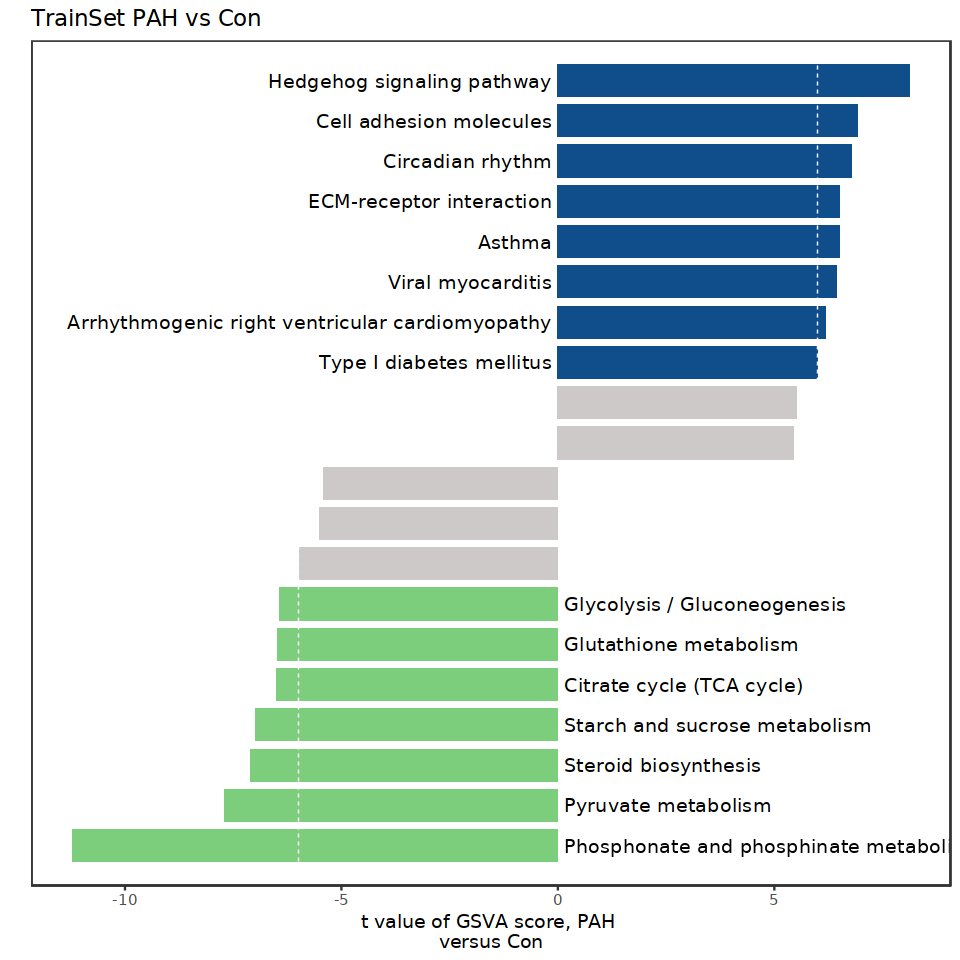

In [91]:
ggplot(df,aes(x=index,y=score,fill=group)) +
geom_bar(stat = 'identity',width = 0.8) +
scale_fill_manual(values = c("palegreen3","snow3","dodgerblue4")) + 
scale_x_discrete(expand = expand_scale(add = .6)) +
scale_y_continuous(breaks=seq(-30, 20, 5)) +
coord_flip() + 
geom_hline(yintercept = c(-6,6),color="white",linetype = 2,#
           size = 0.3) +
geom_text(data = subset(df, score > 6),    ###  
          aes(x=index, y=0, label=paste0(id," "), color = group),#bar
          size = 4, #
          hjust = "inward" ) +
geom_text(data = subset(df, score < -6),  # 
          aes(x=index, y=0, label=paste0(" ",id), color = group),
          size = 4, hjust = "outward") +scale_colour_manual(values = c("black","black",'grey')) +
labs(x = "", y = "t value of GSVA score, PAH \n versus Con ",
     title = "TrainSet PAH vs Con") +
theme_bw() + #
theme(panel.grid =element_blank()) + #
theme(panel.border = element_rect(size = 0.6)) + #
theme(axis.line.y = element_blank(), axis.ticks.y = element_blank(), axis.text.y = element_blank()) + #去除y
guides(fill=FALSE,color=FALSE)

In [92]:
ggsave('./fig1-trainset/gsva.pdf',width = 7,height = 6)

In [94]:
data = expr[jiaoji,]
expr = data

In [95]:

Group =c(rep('Con',25),rep('PAH',58))
head(expr,2)
library(tinyarray)
#cg=names(tail(sort(apply(expr,1,sd)),3000))
cg = jiaoji
n=expr[cg,]
library(edgeR)
#n = cpm(log2(n+1))
n = n [which(rowSums(n) > 0),]
pca <- prcomp(t(n), scale. = T, center = T)  # 
tmp <- as.data.frame(pca$x) 
head(tmp)
tmp$group <- Group
head(tmp)
library(ggplot2)
library(ggsci)
pca.var = pca$sdev^2 %>% as.data.frame()
pca.var$var = round(pca.var$. / sum(pca.var) * 100, 2) 
pca.var$pc = colnames(tmp)[1:(ncol(tmp)-1)]

,GSM3290083,GSM3290085,GSM3290086,GSM3290088,GSM3290091,GSM3290092,GSM3290093,GSM3290094,GSM3290097,GSM3290098,...,GSM3290138,GSM3290139,GSM3290140,GSM3290141,GSM3290142,GSM3290143,GSM3290144,GSM3290145,GSM3290148,GSM3290149
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LTBP1,7.21424,8.26107,7.82586,7.35173,7.63787,7.42743,7.78855,7.85094,7.46202,6.44593,...,8.57393,8.45156,8.69403,8.43591,8.47676,8.05065,8.47834,8.42742,8.47713,8.51237
CSF3R,8.14283,7.30695,7.50516,7.43831,7.66879,8.13326,7.43591,8.26883,7.78984,8.53394,...,7.09238,6.88333,6.26565,6.19347,7.04840,7.37075,6.62192,7.73245,6.80849,6.23626


tinyarray v 2.4.2  welcome to use tinyarray!
If you use tinyarray in published research, please acknowledgements:
We thank Dr.Jianming Zeng(University of Macau), and all the members of his bioinformatics team, biotrainee,especially Xiaojie Sun, for generously sharing their experience and codes.



Attaching package: 'tinyarray'


The following object is masked from 'package:dplyr':

    union_all




,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM3290083,-20.542563,16.267505,-8.206535,1.303925,-4.2922486,2.6857929,-7.137967,4.582940,-4.07230081,1.190910,...,0.2680377,0.03352588,-0.4112370,-0.72556404,0.1855294,-0.226637403,-1.795017e-05,-9.760022e-06,-6.834002e-06,-9.547918e-15
GSM3290085,-10.278498,-11.692184,1.571587,2.012718,1.0433238,3.9710273,-1.834659,2.503403,0.08496417,-1.945457,...,-1.1680877,-0.81692925,1.3138291,0.76775032,-0.2262757,-0.008183829,-1.795031e-05,-9.760059e-06,-6.833900e-06,-8.937295e-15
GSM3290086,-9.269373,-9.829664,2.851612,7.047340,0.3611817,0.9345704,2.985365,-7.025635,-4.94910920,2.546651,...,-0.5421966,-0.59492725,-0.3352153,0.17589771,0.1545369,-0.192191674,-1.795035e-05,-9.760062e-06,-6.834016e-06,-1.026956e-14
GSM3290088,-16.646334,9.038322,2.923352,5.760845,-1.7688057,-8.2975660,-1.591133,4.703350,6.68153230,-2.493539,...,0.0208208,-0.32722385,0.2435485,0.09681199,-0.2854133,-0.315846078,-1.795033e-05,-9.760049e-06,-6.834055e-06,-1.124101e-14
GSM3290091,-13.765044,-11.035652,3.992077,-2.915948,2.0564326,-2.4247614,3.223610,-2.644484,2.68107664,-4.218653,...,0.2726915,0.29466058,-0.3822261,-0.24251849,-0.3566257,-0.131045081,-1.795039e-05,-9.759967e-06,-6.833976e-06,-8.881784e-15
GSM3290092,-20.972039,1.040151,5.348795,-7.053779,-2.8984930,5.5622046,4.001184,4.507998,-1.75070972,6.095631,...,0.2772954,0.20468040,0.3806196,0.14397921,-0.5099377,0.130624888,2.360509e-05,-1.594010e-05,-1.027152e-05,-1.076916e-14


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,group
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
GSM3290083,-20.542563,16.267505,-8.206535,1.303925,-4.2922486,2.6857929,-7.137967,4.582940,-4.07230081,1.190910,...,0.03352588,-0.4112370,-0.72556404,0.1855294,-0.226637403,-1.795017e-05,-9.760022e-06,-6.834002e-06,-9.547918e-15,Con
GSM3290085,-10.278498,-11.692184,1.571587,2.012718,1.0433238,3.9710273,-1.834659,2.503403,0.08496417,-1.945457,...,-0.81692925,1.3138291,0.76775032,-0.2262757,-0.008183829,-1.795031e-05,-9.760059e-06,-6.833900e-06,-8.937295e-15,Con
GSM3290086,-9.269373,-9.829664,2.851612,7.047340,0.3611817,0.9345704,2.985365,-7.025635,-4.94910920,2.546651,...,-0.59492725,-0.3352153,0.17589771,0.1545369,-0.192191674,-1.795035e-05,-9.760062e-06,-6.834016e-06,-1.026956e-14,Con
GSM3290088,-16.646334,9.038322,2.923352,5.760845,-1.7688057,-8.2975660,-1.591133,4.703350,6.68153230,-2.493539,...,-0.32722385,0.2435485,0.09681199,-0.2854133,-0.315846078,-1.795033e-05,-9.760049e-06,-6.834055e-06,-1.124101e-14,Con
GSM3290091,-13.765044,-11.035652,3.992077,-2.915948,2.0564326,-2.4247614,3.223610,-2.644484,2.68107664,-4.218653,...,0.29466058,-0.3822261,-0.24251849,-0.3566257,-0.131045081,-1.795039e-05,-9.759967e-06,-6.833976e-06,-8.881784e-15,Con
GSM3290092,-20.972039,1.040151,5.348795,-7.053779,-2.8984930,5.5622046,4.001184,4.507998,-1.75070972,6.095631,...,0.20468040,0.3806196,0.14397921,-0.5099377,0.130624888,2.360509e-05,-1.594010e-05,-1.027152e-05,-1.076916e-14,Con


In [96]:
# ggplot(pca.var, aes(pc, var, fill = pc)) +
#   geom_bar(stat = 'identity')+
#   scale_y_continuous(expand = c(0,0)) +
#   theme_bw() + labs(x = 'PCs', y = "Pcs Contributions(%)")

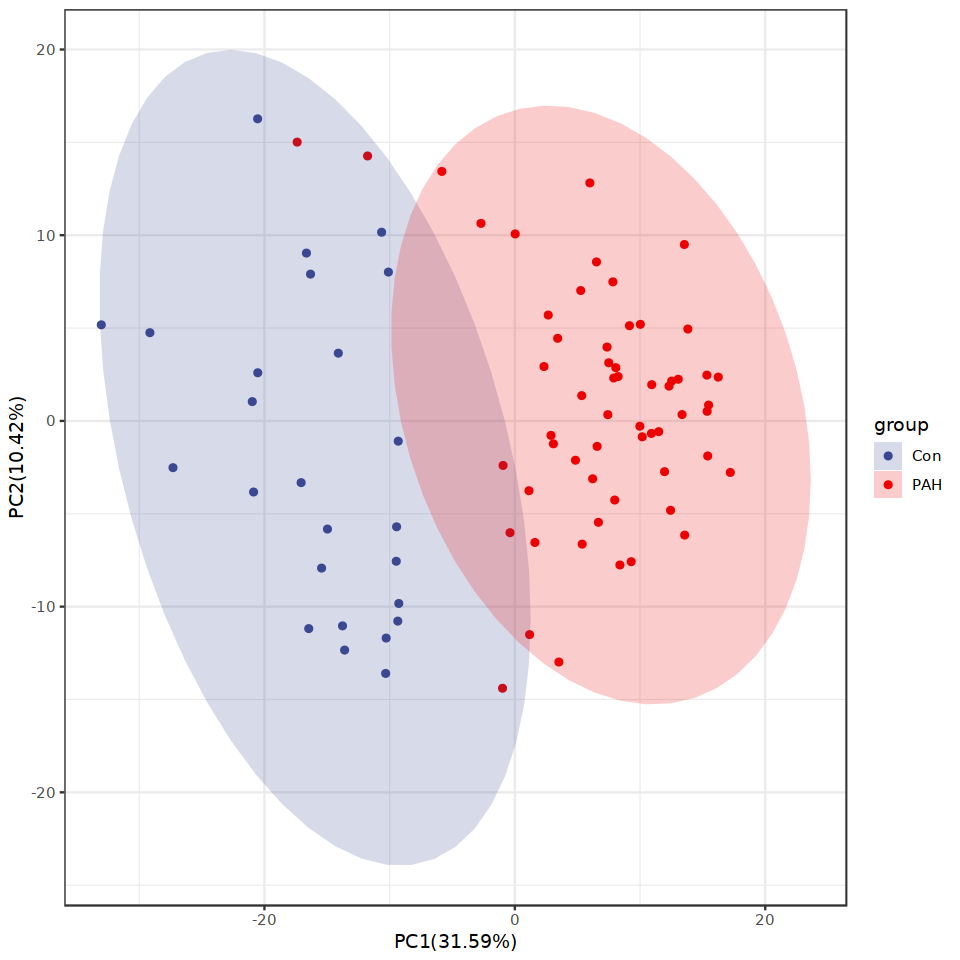

In [97]:
ggplot(tmp, aes(PC1, PC2))+
  geom_point(aes(color = group))+
  stat_ellipse(aes(fill=group), alpha = 0.2,
               geom ="polygon",type = "norm")+
  scale_fill_aaas()+
  scale_color_aaas()+
  theme_bw()+ 
 
  labs(x = paste('PC1(', pca.var$var[1],'%)', sep = ''),
       y = paste('PC2(', pca.var$var[2],'%)', sep = ''))

In [98]:
ggsave('./fig1-trainset/pca.pdf',width = 8,height = 8)

In [99]:
library(clusterProfiler)
library(enrichplot)
library(org.Hs.eg.db)
diffgene = diff
#
diffgene$gene <- rownames(diffgene)
ids=bitr(diffgene$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')
#
diffgene=merge(diffgene,ids,by.x='gene',by.y='SYMBOL')

cluster3.markers = diffgene
#
cluster3.markers <- cluster3.markers[order(cluster3.markers$logFC,decreasing = T),]
#
cluster3.markers_list <- as.numeric(cluster3.markers$logFC)
names(cluster3.markers_list) <- cluster3.markers$gene
head(cluster3.markers_list)
#
cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0]
length(cluster3_de)

library(SummarizedExperiment) #
library(dplyr)
library(tibble)
library(clusterProfiler)
library(org.Hs.eg.db)
library(stringr)
library(msigdbr)

geneSet = msigdbr(species = "Homo sapiens") #Mus musculus, Homo sapiens
geneSet %>% dplyr::distinct(gs_cat, gs_subcat) %>% dplyr::arrange(gs_cat, gs_subcat)
geneSet = geneSet %>% dplyr::select(gs_name, gene_symbol)
my_geneSet = geneSet %>% filter(grepl('HP_LACTIC_ACIDOSIS', gs_name))
GSEA_enrichment <- GSEA(cluster3.markers_list,                 # 
                        TERM2GENE = geneSet,      # 
                        pvalueCutoff = 0.05,      # 
                        pAdjustMethod = "BH")     # 
result <- data.frame(GSEA_enrichment)

    library(GseaVis)
geneset_plot <- c("HP_LACTIC_ACIDOSIS",'HALLMARK_GLYCOLYSIS')





pdf('./fig1-trainset/GSEA_plot1.pdf', width = 6.5, height = 5.5)
gseaNb(object = GSEA_enrichment,
       geneSetID = geneset_plot,
       #addGene = mygene,
       addPval = T,
       pvalX = 0.65,pvalY = 0.6,
       pCol = 'black',
       pHjust = 0)
dev.off()

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diffgene$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"6.21% of input gene IDs are fail to map..."


HBB     HBA1     HBA2     ASPN    SFRP2    VCAM1 
2.459521 2.081188 2.081188 1.704880 1.635857 1.620830

[1] 19838

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count


The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars

gs_cat,gs_subcat
<chr>,<chr>
C1,
C2,CGP
C2,CP
C2,CP:BIOCARTA
C2,CP:KEGG
C2,CP:PID
C2,CP:REACTOME
C2,CP:WIKIPATHWAYS
C3,MIR:MIRDB


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (5.65% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2



png 
  2

In [100]:
library(clusterProfiler)
library(enrichplot)
library(org.Hs.eg.db)
diffgene = diff
#
diffgene$gene <- rownames(diffgene)
ids=bitr(diffgene$gene,'SYMBOL','ENTREZID','org.Hs.eg.db')
#
diffgene=merge(diffgene,ids,by.x='gene',by.y='SYMBOL')

cluster3.markers = diffgene
#
cluster3.markers <- cluster3.markers[order(cluster3.markers$logFC,decreasing = T),]
#
cluster3.markers_list <- as.numeric(cluster3.markers$logFC)
names(cluster3.markers_list) <- cluster3.markers$gene
head(cluster3.markers_list)
#
cluster3_de <- names(cluster3.markers_list)[abs(cluster3.markers_list) > 0]
length(cluster3_de)

library(SummarizedExperiment) #
library(dplyr)
library(tibble)
library(clusterProfiler)
library(org.Hs.eg.db)
library(stringr)
library(msigdbr)

geneSet = msigdbr(species = "Homo sapiens") #Mus musculus, Homo sapiens
geneSet %>% dplyr::distinct(gs_cat, gs_subcat) %>% dplyr::arrange(gs_cat, gs_subcat)
geneSet = geneSet %>% dplyr::select(gs_name, gene_symbol)

my_geneSet = geneSet %>% filter(grepl('HP_LACTIC_ACIDOSIS', gs_name))

GSEA_enrichment <- GSEA(cluster3.markers_list,                 # 
                        TERM2GENE = geneSet,      # 
                        pvalueCutoff = 0.05,      # 
                        pAdjustMethod = "BH")     # 
result <- data.frame(GSEA_enrichment)

    library(GseaVis)

#dev.off()

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(diffgene$gene, "SYMBOL", "ENTREZID", "org.Hs.eg.db"):
"6.21% of input gene IDs are fail to map..."


HBB     HBA1     HBA2     ASPN    SFRP2    VCAM1 
2.459521 2.081188 2.081188 1.704880 1.635857 1.620830

[1] 19838

gs_cat,gs_subcat
<chr>,<chr>
C1,
C2,CGP
C2,CP
C2,CP:BIOCARTA
C2,CP:KEGG
C2,CP:PID
C2,CP:REACTOME
C2,CP:WIKIPATHWAYS
C3,MIR:MIRDB


preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (5.65% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are duplicate gene names, fgsea may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



In [101]:
grep('STARCH',GSEA_enrichment@result$ID,value = T)

[1] "KEGG_STARCH_AND_SUCROSE_METABOLISM"

In [102]:
pdf('./new3//GSEA_plot1.pdf', width = 6.5, height = 5.5)

In [103]:
geneset_plot <- c("KEGG_CITRATE_CYCLE_TCA_CYCLE",'KEGG_STARCH_AND_SUCROSE_METABOLISM')
pdf('./fig1-trainset/GSEA_plot1.pdf', width = 6.5, height = 5.5)
gseaNb(object = GSEA_enrichment,
       geneSetID = geneset_plot,
       #addGene = mygene,
       addPval = T,
       pvalX = 0.65,pvalY = 0.6,
       pCol = 'black',
       pHjust = 0)
dev.off()

png 
  2